Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

    
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
col = df.columns.tolist()
print("This are the columns into this dataset :\n",col)

This are the columns into this dataset :
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


column name 'SibSp' :
 SibSp ka matlab hai "Siblings and Spouses." Iska use passengers ke family connections ko dikhane ke liye hota hai.
Siblings: Isme bhai, behen ya koi aur close relative shamil ho sakte hain jo aapas me related hain. Spouses: Isme husband ya wife bhi shamil hai.

Isse ye pata chalta hai ki passengers apne family ke saath safar kar rahe hain ya nahi. Ye information survival analysis ke liye bhi useful hoti hai, kyunki family connections ka survival rate par asar pad sakta hai.

column name 'Parch' : Parch ka matlab hai "Parents and Children." Iska use passenger ke family structure ko samajhne ke liye hota hai.

Parents: Isme mother ya father shamil hote hain. Children: Isme koi bhi aisa baccha shamil hai jo passenger ke saath safar kar raha hai, chahe wo biological ho ya adoptive.

Family Connections: Ye batata hai ki passenger kitna supportive environment mein hai, jo survival ki chances par asar dal sakta hai. Travel Patterns: Isse yeh bhi pata chalta hai ki log kis tarah se apne family ke saath safar karte hain.

In [7]:
print("In this dataset there are columns",len(df.axes[1]))
print("In this dataset there are rows",len(df.axes[0]))

In this dataset there are columns 12
In this dataset there are rows 891


In [8]:
male = df['Sex'].value_counts().iloc[0]
female =  df['Sex'].value_counts().iloc[1]

In [9]:
print(f'There are {male} males and {female} females in the Ship')

There are 577 males and 314 females in the Ship


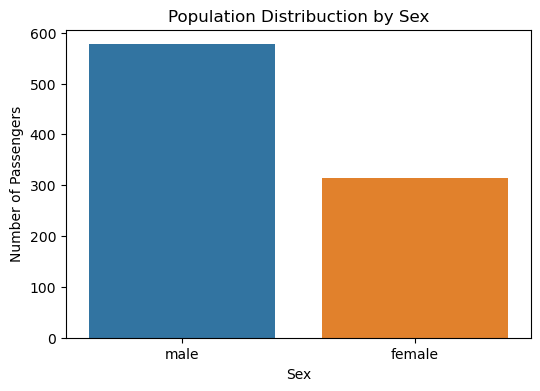

In [10]:
# Visualizetion Sex Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex' , data = df)
plt.title("Population Distribuction by Sex")
plt.xlabel("Sex")
plt.ylabel('Number of Passengers')
plt.show()

In [11]:
print("There are the total passengers in the ship : ",len(df.axes[0]))

There are the total passengers in the ship :  891


In [12]:
print("In the Ship there are 3 Different class : \n",df['Pclass'].unique().tolist())

In the Ship there are 3 Different class : 
 [3, 1, 2]


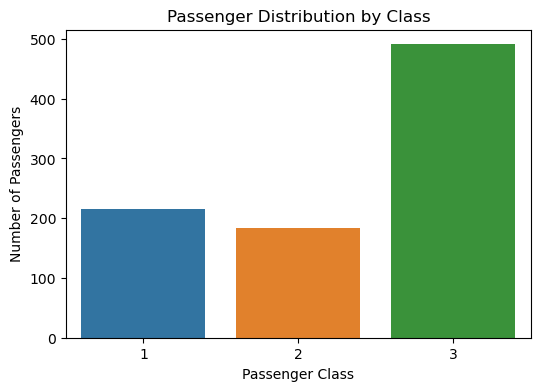

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',data=df)
plt.title('Passenger Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

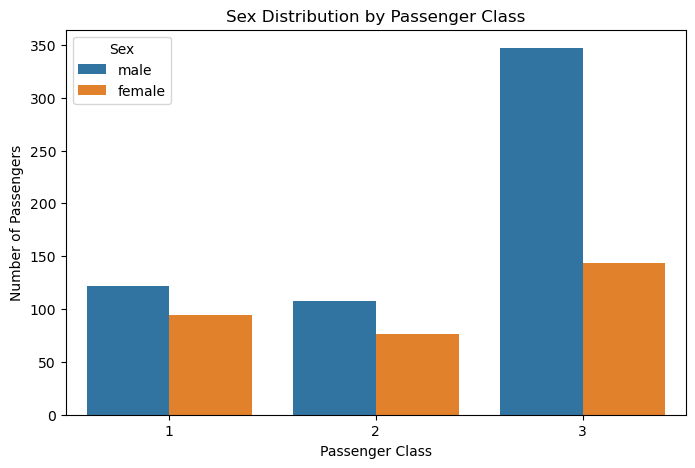

In [14]:

# Visualize Sex distribution by Pclass
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.title('Sex Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()


# Exploratory Data Analysis1

In [15]:
df.shape

(891, 12)

In [16]:
duplicate=df.duplicated()
duplicate.value_counts()
print("There no duplicate value into this dataset ")

There no duplicate value into this dataset 


In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The Age columns data type is  object we have to convert this into integer datatype


In [18]:
df['Age'] = pd.to_numeric(df['Age'] , errors = 'coerce')

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
(df.isnull().sum() / df.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Into the Column Cabin contain 77.10%   this is  more than 50% Null values are present in this column so we delete this column    

In [22]:
del df['Cabin']

We Drop two rows for removeing null values for Embarked   column 

In [23]:
df['Embarked'].dropna(inplace=True)

In [24]:
av=df['Age'].mean()

In [25]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [26]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [27]:
# Converting 'Age' column to integer type
df['Age'] = df['Age'].round().astype(int)

In [28]:
df['Age'] = df['Age'].replace(0,1)

In [29]:
df['Age'].unique()

array([22, 38, 26, 35, 30, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17,
       32, 16, 25,  1, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       56, 44, 61, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80,
        6, 74])

C:\Users\ANURAG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


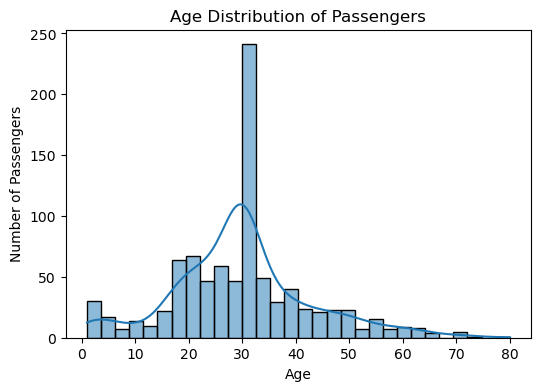

In [30]:

# Visualize Age distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Find out the top 5 age people in the ship

In [31]:
df['Age'].value_counts().head(5)

Age
30    204
24     32
22     27
28     27
18     26
Name: count, dtype: int64

<Axes: xlabel='Age'>

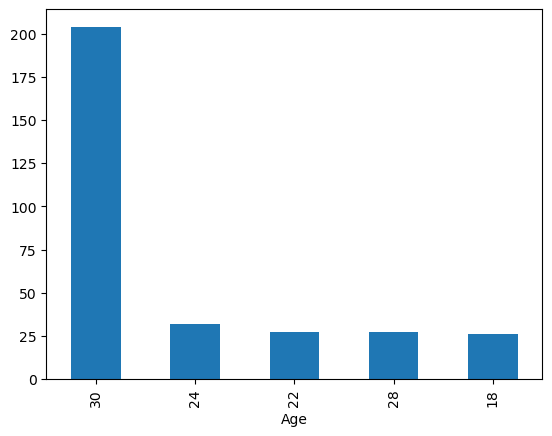

In [32]:
df['Age'].value_counts().head(5).plot(kind='bar')

# Find out the Bottom 5 age people in the ship

In [33]:
df['Age'].value_counts().tail(5)

Age
12    1
53    1
66    1
80    1
74    1
Name: count, dtype: int64

<Axes: xlabel='Age'>

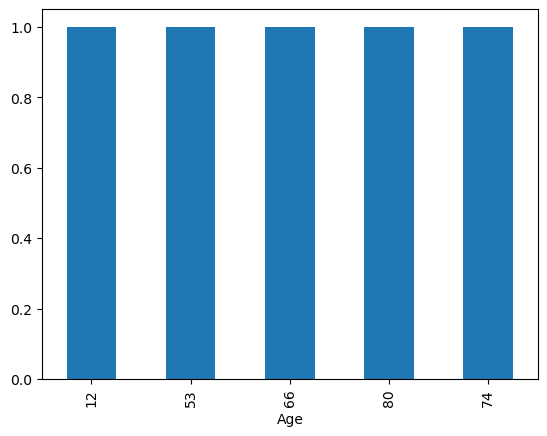

In [34]:
df['Age'].value_counts().tail(5).plot(kind='bar')

# Survivel Analysis

In [35]:
l = []

for i in df['Survived']:
    if i == 0:
        l.append("Not Survive")
    else:
        l.append("Survived")

df['Survive'] = l

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survive
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Not Survive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Not Survive
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,Not Survive
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Survived
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.4500,S,Not Survive
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,Survived


# Find out how many passengers has Not Survive and Survive

In [37]:
df['Survive'].value_counts()

Survive
Not Survive    549
Survived       342
Name: count, dtype: int64

<Axes: xlabel='Survive', ylabel='count'>

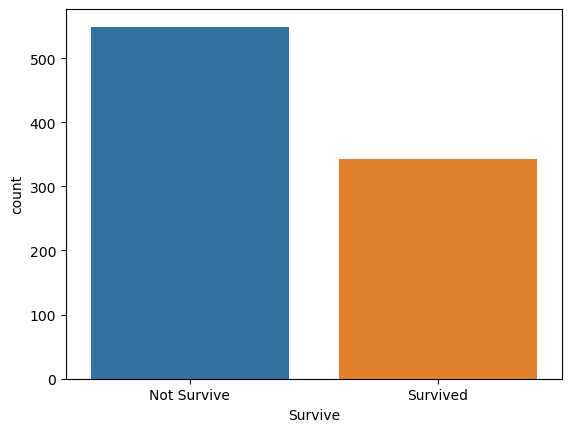

In [38]:
# Visulazation
sns.countplot(x='Survive',data=df)

# 1. What was the survival rate based on gender?

In [39]:
# Group by gender and calculate the survival rate
survival_rate_gender = df.groupby('Sex')['Survived'].mean() * 100

# Display the result
print(survival_rate_gender)


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [88]:
print(f'There are {male} males and {female} females in the Ship')

There are 577 males and 314 females in the Ship


In [40]:
Not_Survive = df.groupby(['Survive','Sex']).size().head(2)
Not_Survive

Survive      Sex   
Not Survive  female     81
             male      468
dtype: int64

In [41]:
Survive = df.groupby(['Survive','Sex']).size().tail(2)
Survive

Survive   Sex   
Survived  female    233
          male      109
dtype: int64

<Axes: xlabel='Survive', ylabel='count'>

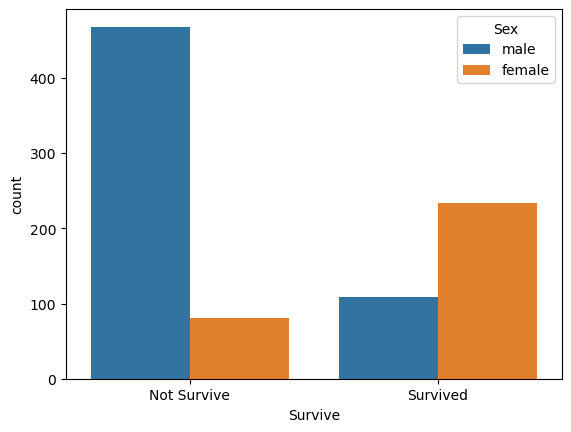

In [42]:
sns.countplot(x='Survive',hue = 'Sex' ,data=df)

In [43]:
Not_Survive_female = df.groupby(['Survive','Sex']).size()[0]
Not_Survive_male = df.groupby(['Survive','Sex']).size()[1]
Survive_female = df.groupby(['Survive','Sex']).size()[2]
Survive_male = df.groupby(['Survive','Sex']).size()[3]


C:\Users\ANURAG\AppData\Local\Temp\ipykernel_7764\4191779852.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Not_Survive_female = df.groupby(['Survive','Sex']).size()[0]
C:\Users\ANURAG\AppData\Local\Temp\ipykernel_7764\4191779852.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Not_Survive_male = df.groupby(['Survive','Sex']).size()[1]
C:\Users\ANURAG\AppData\Local\Temp\ipykernel_7764\4191779852.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

In [44]:
print(f"There are {Not_Survive_female} females who did not survive, and {Not_Survive_male} males who did not survive.")

There are 81 females who did not survive, and 468 males who did not survive.


In [45]:
print(f"There are {Survive_female} females who survived and {Survive_male} males who survived.")

There are 233 females who survived and 109 males who survived.


# Find out the which Age Group passenger has more Survived

In [46]:
list = []

for i in df['Age']:
    if i < 2:
        list.append('Baby')
    elif i < 12:
        list.append('Child')
    elif i < 18:
        list.append('Teenager')
    elif i< 35:
        list.append('Young Adult')
    elif i < 65:
        list.append('Adult')
    else:
        list.append('Senior')

df['Age_Group'] = list

In [47]:
df.groupby(['Survive','Age_Group']).size()

Survive      Age_Group  
Not Survive  Adult          131
             Baby             2
             Child           27
             Senior          10
             Teenager        23
             Young Adult    356
Survived     Adult           93
             Baby            12
             Child           27
             Senior           1
             Teenager        22
             Young Adult    187
dtype: int64

<Axes: xlabel='Age_Group', ylabel='count'>

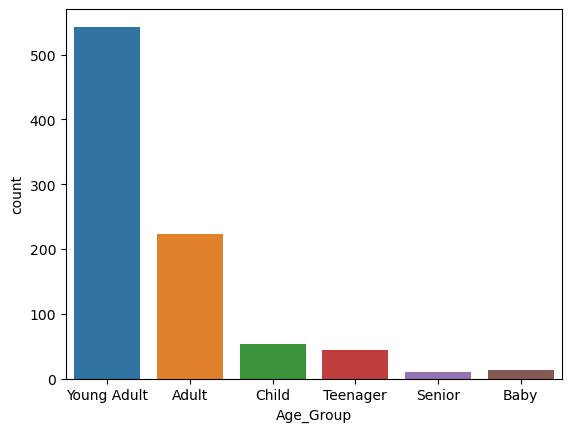

In [48]:
sns.countplot(x='Age_Group' , data=df)

<Axes: xlabel='Age_Group', ylabel='count'>

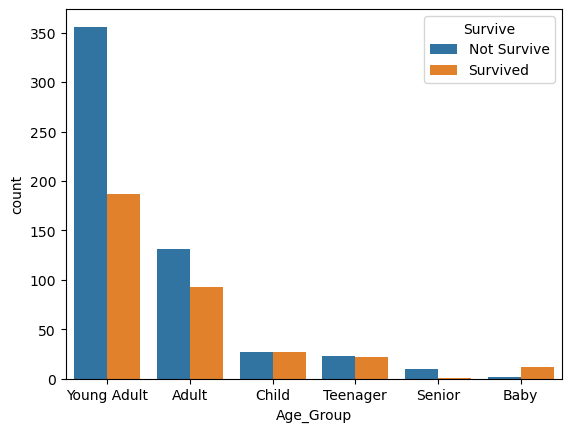

In [49]:
sns.countplot(x='Age_Group' ,hue='Survive', data=df)

In [50]:
df['Age_Group'].value_counts()

Age_Group
Young Adult    543
Adult          224
Child           54
Teenager        45
Baby            14
Senior          11
Name: count, dtype: int64

# 2. Which passenger class (Pclass) had the highest survival rate?

In [51]:
Survival_rate_Pclass = df.groupby('Pclass')['Survived'].mean()*100
Survival_rate_Pclass

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

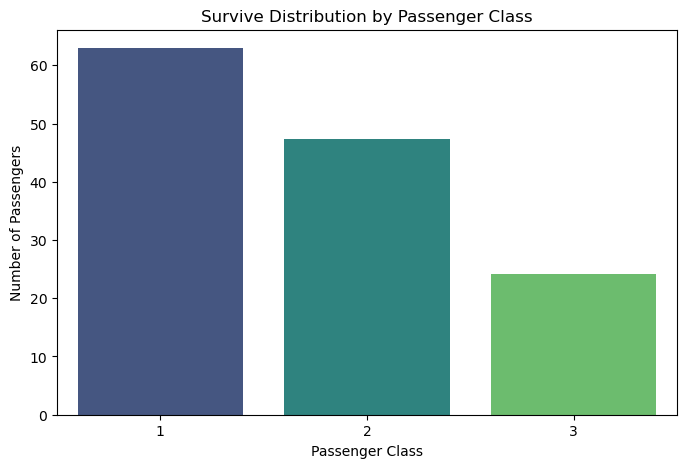

In [52]:

# Visualize Sex distribution by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x=Survival_rate_Pclass.index, y = Survival_rate_Pclass.values, palette='viridis')
plt.title('Survive Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()


# 3. How does age affect the survival rate?


In [53]:
df['Age_Group'].value_counts()

Age_Group
Young Adult    543
Adult          224
Child           54
Teenager        45
Baby            14
Senior          11
Name: count, dtype: int64

In [54]:
df.groupby('Age')['Survived'].sum().sort_values(ascending=False).head(3)

Age
30    62
24    15
1     12
Name: Survived, dtype: int64

In [55]:
df.groupby('Age_Group')['Survived'].sum().sort_values(ascending=False)

Age_Group
Young Adult    187
Adult           93
Child           27
Teenager        22
Baby            12
Senior           1
Name: Survived, dtype: int64

In [56]:
survival_rate_age=df.groupby('Age_Group')['Survived'].mean().sort_values(ascending=False)*100
survival_rate_age

Age_Group
Baby           85.714286
Child          50.000000
Teenager       48.888889
Adult          41.517857
Young Adult    34.438306
Senior          9.090909
Name: Survived, dtype: float64

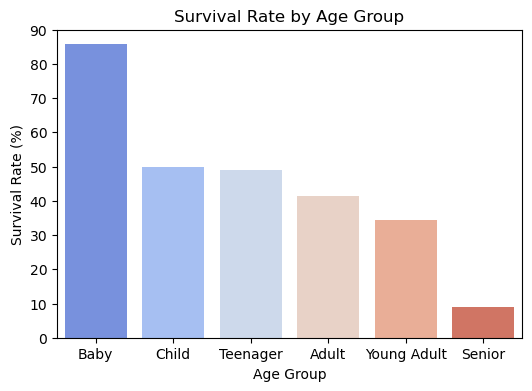

In [57]:

# Plot the survival rate for each age group
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_age.index, y=survival_rate_age.values, palette='coolwarm')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')
plt.show()

# 4. Did the number of siblings or spouses aboard (SibSp) impact survival?
Kya jahaz par kitne bhai-behen ya pati-patni (SibSp) the, isne survival ko affect kiya?

In [58]:
survival_rate_SibSp=df.groupby('SibSp')['Survived'].mean().sort_values(ascending=False)*100
survival_rate_SibSp

SibSp
1    53.588517
2    46.428571
0    34.539474
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

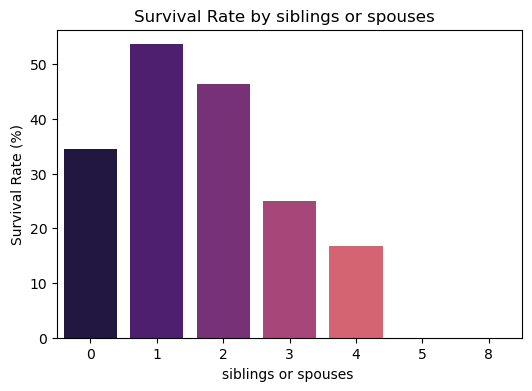

In [59]:

# Plot the survival rate for each age group
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_SibSp.index, y=survival_rate_SibSp.values, palette='magma')

# Add labels and title
plt.xlabel('siblings or spouses ')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by siblings or spouses  ')
plt.show()

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survive,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Not Survive,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Survived,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Survived,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Survived,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Not Survive,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,Not Survive,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Survived,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.4500,S,Not Survive,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,Survived,Young Adult


In [61]:
df.Fare.idxmin()

179

In [62]:
df.loc[258]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Embarked                      C
Survive                Survived
Age_Group                 Adult
Name: 258, dtype: object

In [63]:
df.loc[179]

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                             36
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                           0.0
Embarked                         S
Survive                Not Survive
Age_Group                    Adult
Name: 179, dtype: object

In [64]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [65]:
df['Fare'].sort_values(ascending=False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

In [66]:
fare_ =df.sort_values('Fare',ascending= False).head(20)

<Axes: xlabel='Survive', ylabel='count'>

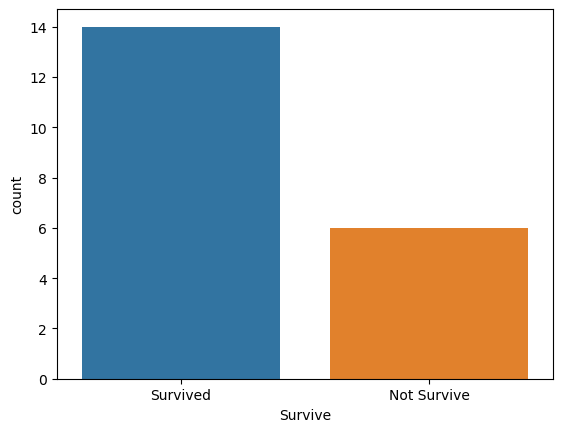

In [68]:
# Visulazation
sns.countplot(x='Survive',data=fare_)

In [69]:
fare =df.sort_values('Fare',ascending= False).tail(20)

<Axes: xlabel='Survive', ylabel='count'>

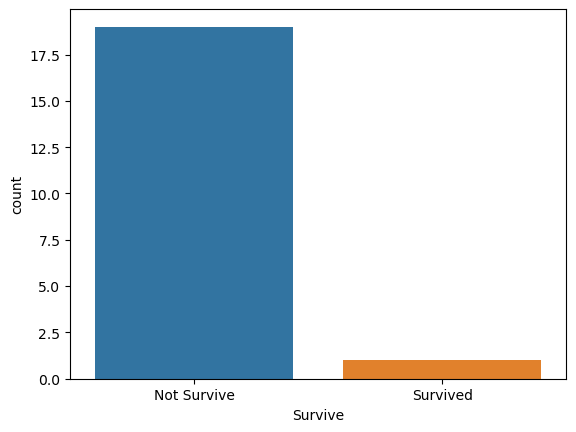

In [70]:
# Visulazation
sns.countplot(x='Survive',data=fare)

In [76]:
pclass_1 =  df.loc[df['Pclass'] == 1 ]
pclass_2 =  df.loc[df['Pclass'] == 2 ]
pclass_3 =  df.loc[df['Pclass'] == 3 ]

In [77]:
pclass_1 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survive,Age_Group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Survived,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Survived,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,Not Survive,Adult
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,S,Survived,Adult
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,S,Survived,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,S,Survived,Adult
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,5.0000,S,Not Survive,Young Adult
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C,Survived,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Survived,Young Adult


In [86]:
print('There are the passegers into the 1 class : ',pclass_1['PassengerId'].nunique())
pclass_1['Survive'].value_counts()


There are the passegers into the 1 class :  216


Survive
Survived       136
Not Survive     80
Name: count, dtype: int64

In [81]:
print('There are the passegers into the 2 class : ',pclass_2['PassengerId'].nunique())
pclass_2['Survive'].value_counts()

There are the passegers into the 2 class :  184


Survive
Not Survive    97
Survived       87
Name: count, dtype: int64

In [82]:
print('There are the passegers into the 3 class : ',pclass_3['PassengerId'].nunique())
pclass_3['Survive'].value_counts()

There are the passegers into the 3 class :  491


Survive
Not Survive    372
Survived       119
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

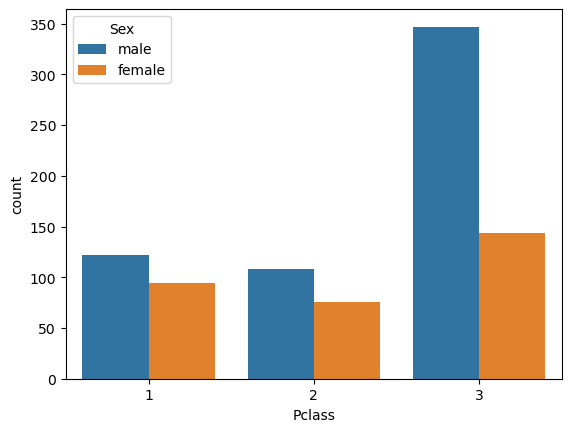

In [87]:
sns.countplot(x='Pclass',hue = 'Sex' ,data=df)